#beyond Linearity

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# 读取数据
wage_df = pd.read_csv('data/Wage.csv')
wage_df.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


##Polynomial Regression and Step Functions

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
X = wage_df[['age']].values
y = wage_df['wage']
#将特征换为多项式
poly = PolynomialFeatures(degree=4)
X_degree4 = poly.fit_transform(X)

In [23]:
ols = sm.OLS(y,X_degree4).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Tue, 15 Sep 2015   Prob (F-statistic):           2.77e-57
Time:                        15:17:59   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -184.1542     60.040     -3.067      0.002      -301.879   -66.430
x1            21.2455      5.887      3.609      0.000         9.703    32.788
x2            -0.5639      0.206     -2.736      0.006        -0.968    -0.160
x3             0.0068      0.003      2.221      0.026         0.001     0.013
x4         -3.204e-05   1.64e-05     -1.952      0.051     -6.42e-05  1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

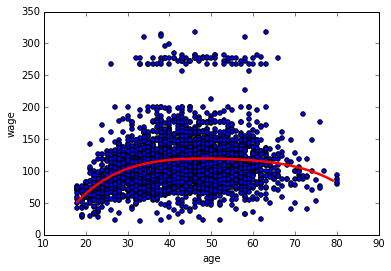

In [41]:
#图形显示拟合的形状
fig,ax = plt.subplots()
ax.scatter(x = X,y=y)
ax.set_xlabel('age')
ax.set_ylabel('wage')
xs = range(int(np.min(X[:,0])),int(np.max(X[:,0])))
xs_degree4 = [poly.fit_transform(x) for x in xs]
ys = [ols.predict(x)[0] for x in xs_degree4]
ax.plot(xs,ys,'r',linewidth=2.5)

###Splines

In [49]:
from scipy.interpolate import LSQUnivariateSpline

In [52]:
x = wage_df['age'].values
y = wage_df['wage'].values
x = [i for (i,j) in sorted(zip(x,y))]
y = [j for (i,j) in sorted(zip(x,y))]
t=[20,40,60]
sql = LSQUnivariateSpline(x,y,t)

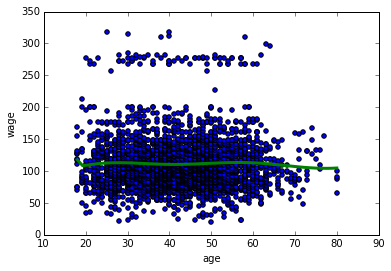

In [53]:
fig,ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('age')
ax.set_ylabel('wage')

xs = np.linspace(x[0],x[-1])
ax.plot(xs,sql(xs),'g-',lw=3,)